# Notebook for Data Exploration

This notebook performs exploratory data analysis (EDA) on the MovieLens dataset provided for the collaborative filtering project.

In [2]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sys
import os

## Dataset Configuration:

The dataset is split into training, testing, and evaluation sets. We will initially combine the training and testing sets for exploration.

$$
M_{\text{data}} = M_{\text{train}} \cup M_{\text{test}} \cup M_{\text{eval}},
\qquad M_{\text{data}},\, M_{\text{train}},\, M_{\text{test}},\, M_{\text{eval}} \in \mathbb{R}^{n \times m} \\
$$

$$
M_{\text{train}} \cap M_{\text{test}} =
M_{\text{train}} \cap M_{\text{eval}} =
M_{\text{test}} \cap M_{\text{eval}} = \varnothing
$$

## Data Loading and First Visualisation

In [3]:
# -- Data Loading --
try:
    namesngenre = np.load("../data/namesngenre.npy", allow_pickle=True)
    ratings_test = np.load("../data/ratings_test.npy")
    ratings_train = np.load("../data/ratings_train.npy")
except FileNotFoundError:
    print(
        "Error: Data files not found. Make sure the relative path '../data/' is correct."
    )
    sys.exit(1)

df_namesngenre = pd.DataFrame(namesngenre, columns=["name", "genre"])

# -- Basic Stats --
n_users, n_movies = ratings_train.shape
mask_train = ~np.isnan(ratings_train)
mask_test = ~np.isnan(ratings_test)

print(f"Rating matrix dimensions: {n_users} users x {n_movies} movies")
print(
    f"Proportion of train ratings: {(np.sum(mask_train) / (n_users * n_movies)) * 100:.2f}%"
)
print(
    f"Proportion of test ratings: {(np.sum(mask_test) / (n_users * n_movies)) * 100:.2f}%"
)
print(f"Length of the NamesnGenre dataset: {len(df_namesngenre)}")
print("\nFirst 10 entries of NamesnGenre:")
print(df_namesngenre.head(10))

Rating matrix dimensions: 610 users x 4980 movies
Proportion of train ratings: 1.04%
Proportion of test ratings: 1.04%
Length of the NamesnGenre dataset: 4980

First 10 entries of NamesnGenre:
                                 name  \
0                    Toy Story (1995)   
1                      Jumanji (1995)   
2             Grumpier Old Men (1995)   
3            Waiting to Exhale (1995)   
4  Father of the Bride Part II (1995)   
5                         Heat (1995)   
6                      Sabrina (1995)   
7                 Tom and Huck (1995)   
8                 Sudden Death (1995)   
9                    GoldenEye (1995)   

                                         genre  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
5                        Action|Crime|Thriller  
6           

In [ ]:
# -- Fusion of Train and Test for Exploration --
ratings = np.copy(ratings_train)
intersection = np.sum(mask_train & mask_test)
print(f"\nIntersection check (should be 0): {intersection}")

# Add test ratings to the combined matrix
ratings[mask_test] = ratings_test[mask_test]

mask_ratings = ~np.isnan(ratings)
print(
    f"Proportion of total known ratings (Train + Test): {(np.sum(mask_ratings) / (n_users * n_movies)) * 100:.2f}%"
)


Intersection check (should be 0): 0
Proportion of total known ratings (Train + Test): 2.08%


## Exploration of Movie Genres (`namesngenre`)

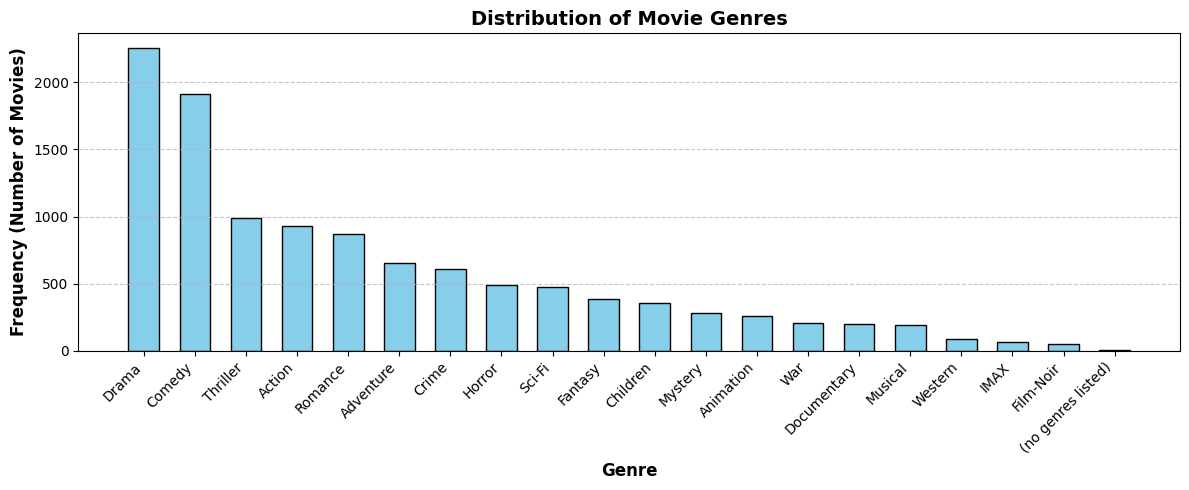

In [ ]:
# Extract and count all genres
all_genres = [
    genre
    for sublist in df_namesngenre["genre"].apply(lambda x: x.split("|"))
    for genre in sublist
]
genre_counts = Counter(all_genres)

# Sort genres by frequency
sorted_genres = sorted(genre_counts.items(), key=lambda item: item[1], reverse=True)
genres, frequencies = zip(*sorted_genres)

# Plot genre distribution
plt.figure(figsize=(12, 5))
plt.bar(genres, frequencies, width=0.6, color="skyblue", edgecolor="black")

plt.xlabel("Genre", fontsize=12, weight="bold")
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.ylabel("Frequency (Number of Movies)", fontsize=12, weight="bold")
plt.title("Distribution of Movie Genres", fontsize=14, weight="bold")

plt.tick_params(axis="both", which="major", labelsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

## Exploration of the Ratings Matrix

### Basic Stats

In [7]:
print(f"\nShape of the combined rating matrix: {ratings.shape}")
print(f"Average rating over known values: {np.nanmean(ratings):.2f}/5")
print(
    f"Min rating: {np.nanmin(ratings):.1f}/5 | Max rating: {np.nanmax(ratings):.1f}/5"
)


Shape of the combined rating matrix: (610, 4980)
Average rating over known values: 3.52/5
Min rating: 0.5/5 | Max rating: 5.0/5


### Highlight Sparsity of the data


Sparsity proportion: 97.92%


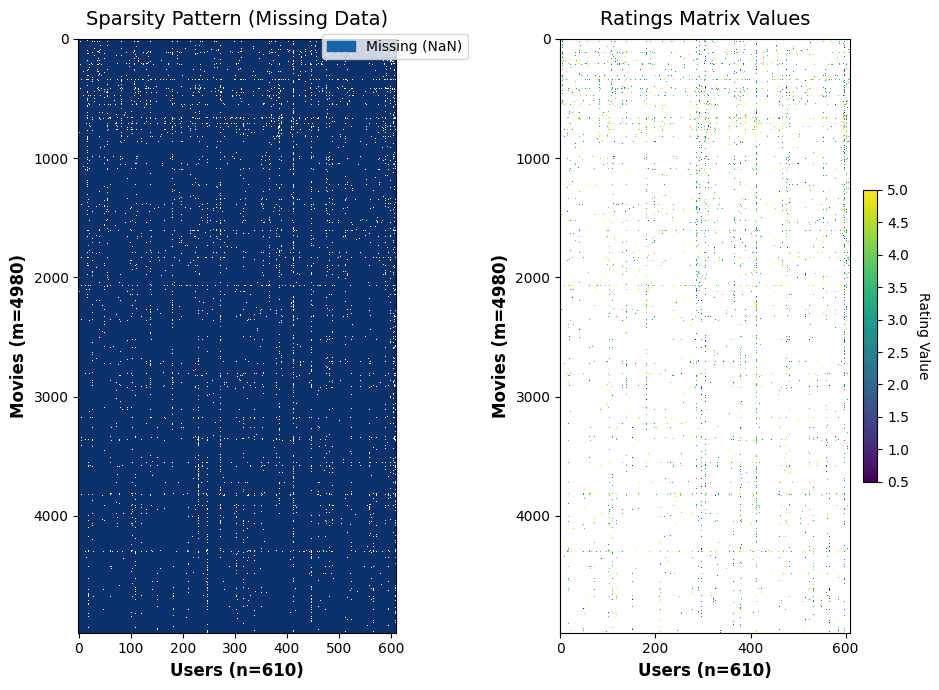

In [8]:
# Visualize Sparsity and Ratings
sparsity_matrix = np.isnan(ratings).T  # Transpose for Movies on Y-axis
sparsity_percentage = (np.sum(sparsity_matrix) / sparsity_matrix.size) * 100
print(f"\nSparsity proportion: {sparsity_percentage:.2f}%")

fig, axes = plt.subplots(1, 2, figsize=(10, 7))  # Adjusted figure size

# Plot Sparsity Pattern
im1 = axes[0].imshow(
    sparsity_matrix, aspect="auto", interpolation="nearest", cmap="Blues"
)
axes[0].set_xlabel(f"Users (n={n_users})", fontsize=12, weight="bold")
axes[0].set_ylabel(f"Movies (m={n_movies})", fontsize=12, weight="bold")
axes[0].set_title("Sparsity Pattern (Missing Data)", fontsize=14, pad=10)
axes[0].grid(False)

# Custom legend for sparsity plot (using a patch)
nan_patch = mpatches.Patch(color=plt.cm.Blues(0.8), label="Missing (NaN)")
axes[0].legend(handles=[nan_patch], loc="upper right", bbox_to_anchor=(1.25, 1.02))


# Plot Ratings Matrix
im2 = axes[1].imshow(
    ratings.T,
    aspect="auto",
    interpolation="nearest",
    cmap="viridis",
    vmin=np.nanmin(ratings),
    vmax=np.nanmax(ratings),
)
axes[1].set_xlabel(f"Users (n={n_users})", fontsize=12, weight="bold")
axes[1].set_ylabel(f"Movies (m={n_movies})", fontsize=12, weight="bold")
axes[1].set_title("Ratings Matrix Values", fontsize=14, pad=10)
axes[1].grid(False)

# Add colorbar
cbar = fig.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)
cbar.set_label("Rating Value", rotation=270, labelpad=15)

plt.tight_layout(rect=[0, 0, 0.95, 1])  # Adjust layout to prevent overlap
plt.show()

### User Behavior Analysis

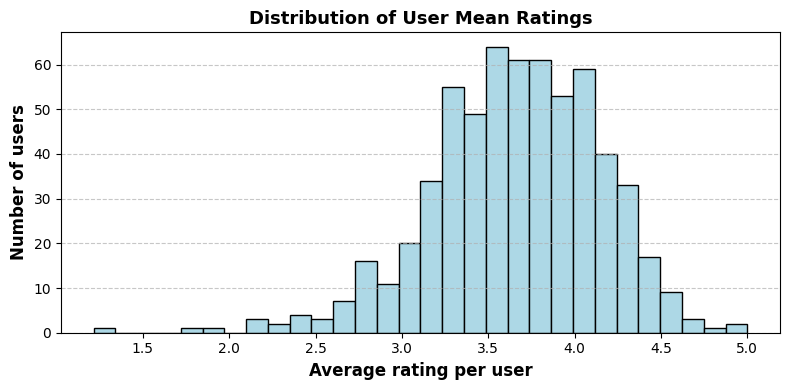

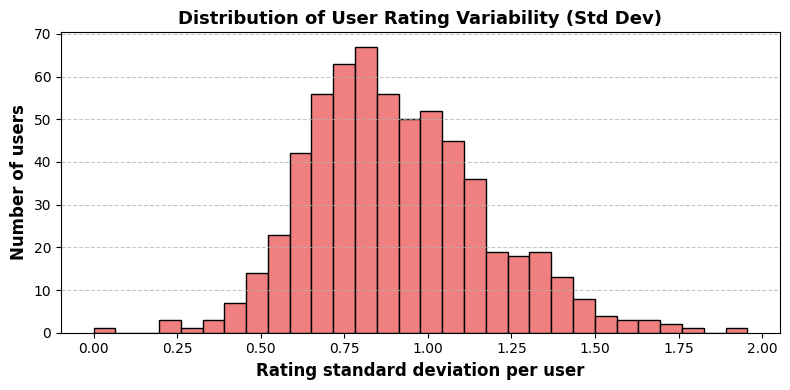

In [15]:
user_means = np.nanmean(ratings, axis=1)

plt.figure(figsize=(8, 4))
plt.hist(user_means, bins=30, edgecolor="black", color="lightblue")
plt.xlabel("Average rating per user", fontsize=12, weight="bold")
plt.ylabel("Number of users", fontsize=12, weight="bold")
plt.title("Distribution of User Mean Ratings", fontsize=13, weight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

user_stds = np.nanstd(ratings, axis=1)

plt.figure(figsize=(8, 4))
plt.hist(user_stds, bins=30, edgecolor="black", color="lightcoral")
plt.xlabel("Rating standard deviation per user", fontsize=12, weight="bold")
plt.ylabel("Number of users", fontsize=12, weight="bold")
plt.title(
    "Distribution of User Rating Variability (Std Dev)", fontsize=13, weight="bold"
)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

- *Observation:* The distributions for both mean and standard deviation are quite wide and spread out.
- *Conclusion:* Users clearly do not use the same rating scale (some rate high, some low; some are consistent, others vary wildly). This strongly suggests the need for normalization, particularly centering by user.

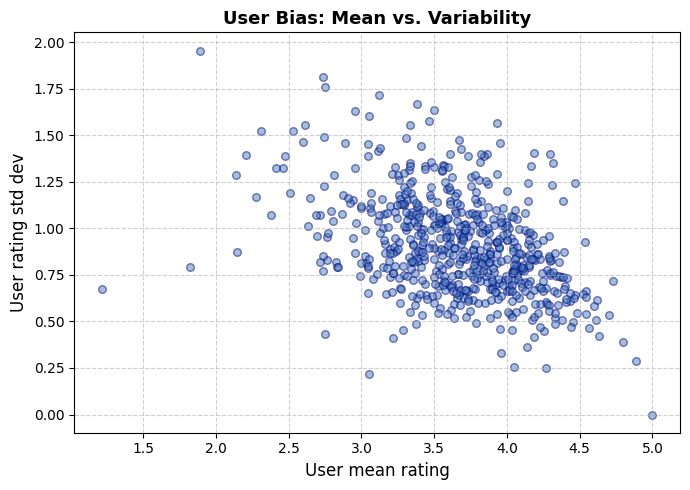

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(
    user_means, user_stds, alpha=0.5, color="steelblue", edgecolor="darkblue", s=30
)
plt.xlabel("User mean rating", fontsize=12)
plt.ylabel("User rating std dev", fontsize=12)
plt.title("User Bias: Mean vs. Variability", fontsize=13, weight="bold")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

- *Interpretation:*
    - *Bottom-left:* Users who tend to rate low and are consistent (low mean, low std).
    - *Bottom-right:* Users who tend to rate high and are consistent (high mean, low std).
    - *Top region:* Users whose ratings vary significantly (high std), regardless of their average.
- *Conclusion:* Diverse user behaviors reinforce the need for user-specific normalization (centering).

### User Activity and Movie Popularity

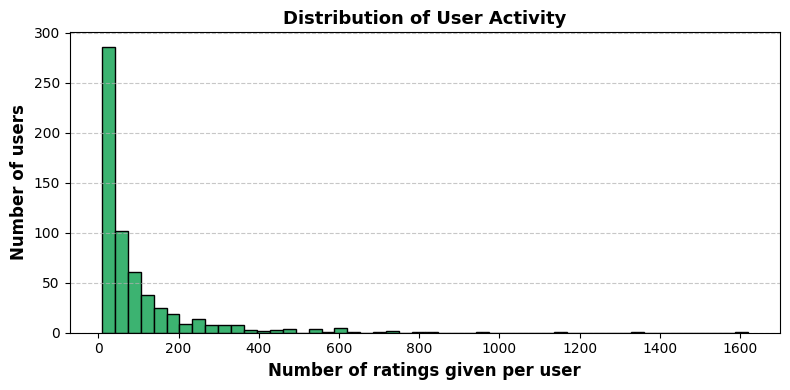

In [17]:
ratings_per_user = np.sum(~np.isnan(ratings), axis=1)

plt.figure(figsize=(8, 4))
plt.hist(
    ratings_per_user, bins=50, edgecolor="black", color="mediumseagreen"
)  # Adjusted bins
plt.xlabel("Number of ratings given per user", fontsize=12, weight="bold")
plt.ylabel("Number of users", fontsize=12, weight="bold")
plt.title("Distribution of User Activity", fontsize=13, weight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

- *Observation:* Many users have provided very few ratings, while a smaller number of users are highly active (long tail distribution).
- *Consideration:* Should users with very few ratings be filtered out during preprocessing? This might improve model stability but reduce coverage.

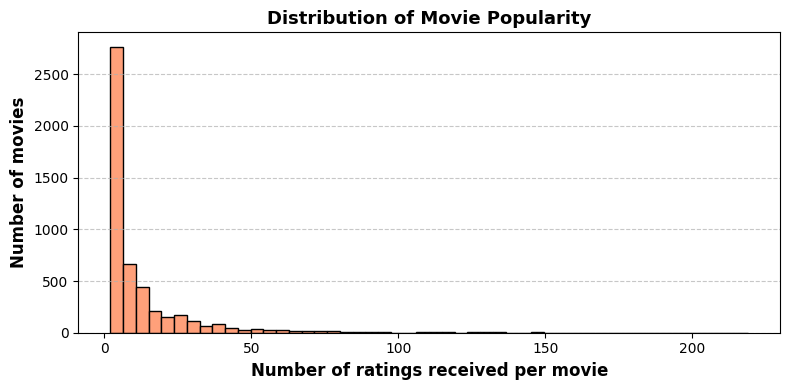

In [18]:
ratings_per_movie = np.sum(~np.isnan(ratings), axis=0)

plt.figure(figsize=(8, 4))
plt.hist(
    ratings_per_movie, bins=50, edgecolor="black", color="lightsalmon"
)  # Adjusted bins
plt.xlabel("Number of ratings received per movie", fontsize=12, weight="bold")
plt.ylabel("Number of movies", fontsize=12, weight="bold")
plt.title("Distribution of Movie Popularity", fontsize=13, weight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

- *Observation:* Similar to users, many movies have few ratings, while some are very popular.
- *Consideration:* Should movies with very few ratings be filtered?

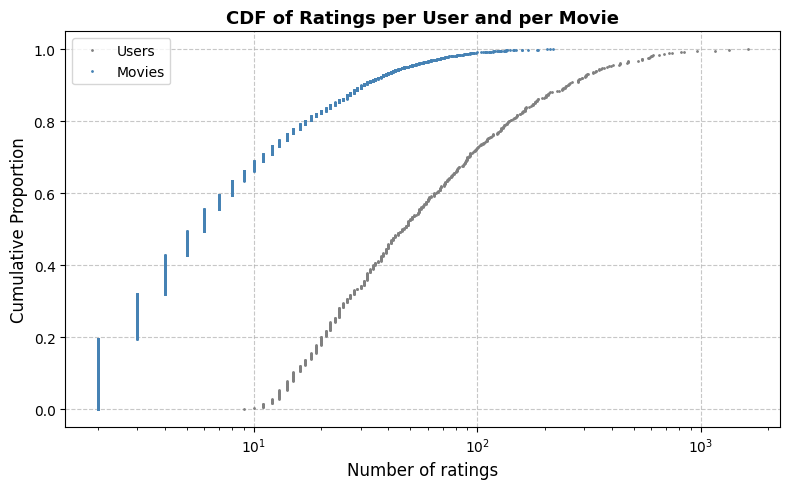

In [19]:
# Cumulative Distribution Function (CDF) plot
def plot_cdf(data, label, color):
    sorted_data = np.sort(data)
    y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(
        sorted_data,
        y,
        marker=".",
        linestyle="none",
        markersize=2,
        label=label,
        color=color,
    )  # Use markers for clarity


plt.figure(figsize=(8, 5))
plot_cdf(ratings_per_user, "Users", "gray")
plot_cdf(ratings_per_movie, "Movies", "steelblue")
plt.xlabel("Number of ratings", fontsize=12)
plt.ylabel("Cumulative Proportion", fontsize=12)
plt.title("CDF of Ratings per User and per Movie", fontsize=13, weight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.xscale("log")  # Log scale often helps visualize long tails
plt.tight_layout()
plt.show()

- *Interpretation:* The CDF plot shows that a large fraction of users and movies have a small number of ratings (steep initial rise). For example, ~50% of users have rated fewer than X movies (read from plot), and ~50% of movies have fewer than Y ratings.

### Preprocessing Considerations Recap

1.  **Normalization / Centering:**
    - *Problem:* Users employ different rating scales (bias).
    - *Solution:* Center ratings per user (subtract user mean) to remove this bias.
    - *Verification:* Plot histograms/scatter plots before and after normalization to confirm its effect.

2.  **Regularization (Implicit/Explicit):**
    - *Problem:* Sparsity can make models unstable.
    - *Solution:* Use explicit regularization terms in models (like ALS/GD) or rely on implicit regularization from methods like SVD truncation. Adding pseudo-observations is less common for MF.

3.  **Filtering:**
    - *Problem:* Users/movies with very few ratings might provide unreliable signals or increase computation unnecessarily.
    - *Solution:* Consider filtering out users and/or movies below a certain rating threshold (e.g., minimum 5 ratings).

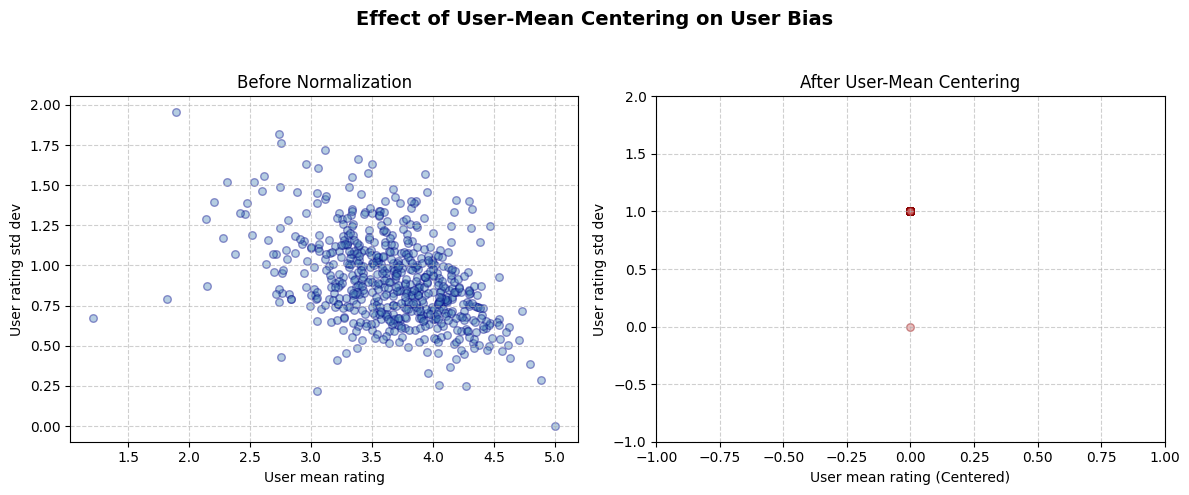

In [52]:
# --- Preprocessing Application and Verification ---

try:
    root_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
    if root_path not in sys.path:
        sys.path.append(root_path)
    from src.preprocessing import DataPreprocessor
except ImportError:
    print("Could not import DataPreprocessor. Skipping preprocessing verification.")
    print("Make sure the path is correct and src/preprocessing.py exists.")
    DataPreprocessor = None  # Define as None to skip the block below

if DataPreprocessor:
    data_preprocessor = DataPreprocessor(method="user_mean")
    ratings_preprocessed = data_preprocessor.normalize(matrix=ratings)

    # --- Verification Plots ---
    user_means_before = np.nanmean(ratings, axis=1)
    user_stds_before = np.nanstd(ratings, axis=1)

    # Calculate stats after normalization (means should be 0)
    user_means_after = np.nanmean(ratings_preprocessed, axis=1)
    user_stds_after = np.nanstd(ratings_preprocessed, axis=1)  # Variance might change

    # --- Scatter plot verification ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].scatter(
        user_means_before,
        user_stds_before,
        alpha=0.4,
        color="steelblue",
        edgecolor="darkblue",
        s=30,
    )
    axes[0].set_title("Before Normalization")
    axes[0].set_xlabel("User mean rating")
    axes[0].set_ylabel("User rating std dev")
    axes[0].grid(True, linestyle="--", alpha=0.6)

    axes[1].scatter(
        user_means_after,
        user_stds_after,
        alpha=0.4,
        color="indianred",
        edgecolor="darkred",
        s=30,
    )
    axes[1].set_title("After User-Mean Centering")
    axes[1].set_xlabel("User mean rating (Centered)")
    axes[1].set_ylabel("User rating std dev")
    axes[1].grid(True, linestyle="--", alpha=0.6)
    axes[1].set_xlim([-1, 1])  # Centered means should be around 0
    axes[1].set_ylim([-1, 2])  # Std dev should be 1

    plt.suptitle(
        "Effect of User-Mean Centering on User Bias", fontsize=14, weight="bold"
    )
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

- *Verification:* The scatter plot after centering shows the user means clustered on 0, confirming the bias removal. The standard deviation is essentially on one, except for one very kind user who only gave 5 stars to movies (hence his standard deviation is zero).